In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




In [32]:
data = pd.read_csv('nba_games.csv', index_col=0)
data = data.dropna()

data.describe()

,rating_a,rating_b,is_home_a,score_a,score_b,team_a_win,total_score
count,26774.000000,26774.000000,26774.000000,26774.000000,26774.000000,26774.000000,26774.000000
mean,389.988467,389.988467,0.500000,109.212482,109.212482,14.448047,218.424965
std,85.564290,85.564290,0.500009,13.416383,13.416383,15.873603,22.449547
min,-4389.976768,-4389.976768,0.000000,52.000000,52.000000,0.000000,123.000000
25%,339.754767,339.754767,0.000000,100.000000,100.000000,0.000000,204.000000
50%,387.362868,387.362868,0.500000,109.000000,109.000000,9.000000,219.000000
75%,436.375812,436.375812,1.000000,118.000000,118.000000,25.000000,233.000000
max,1284.919555,1284.919555,1.000000,176.000000,176.000000,73.000000,351.000000


### Let's observe our data. Hey, that looks like a normal distribution!!

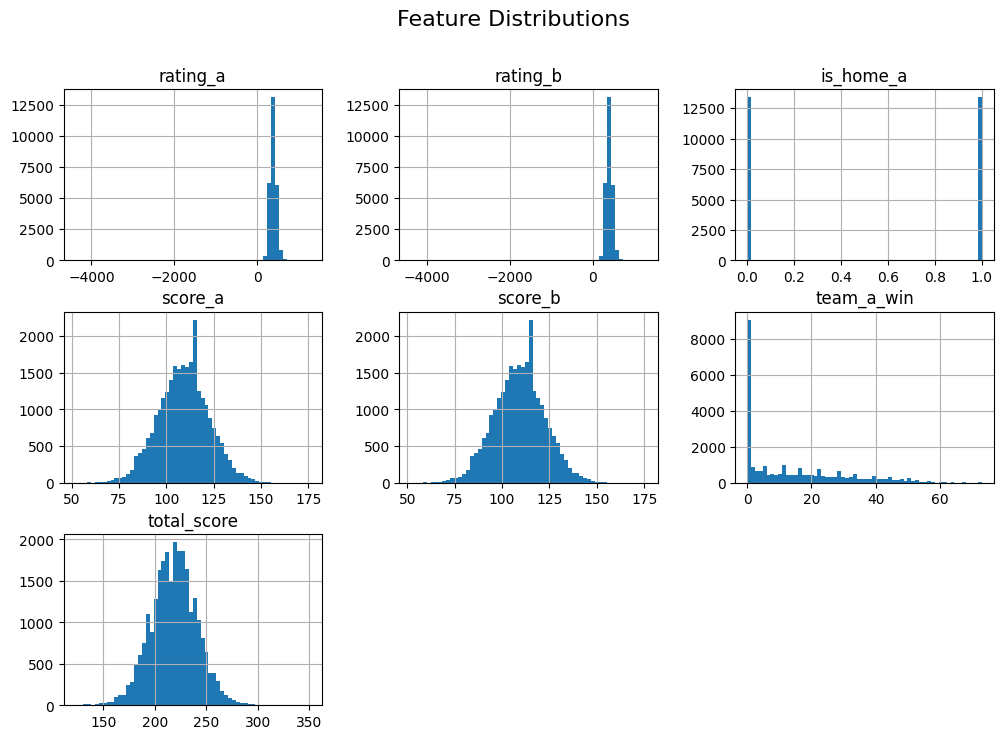

In [33]:
data.hist(figsize=(12, 8), bins=60)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
total_scores = data['total_score'].values
print(np.mean(total_scores))
print(np.var(total_scores))

#variance much higher than mean, will take this into account when selecting a model...



218.4249645178158
503.9633507774816


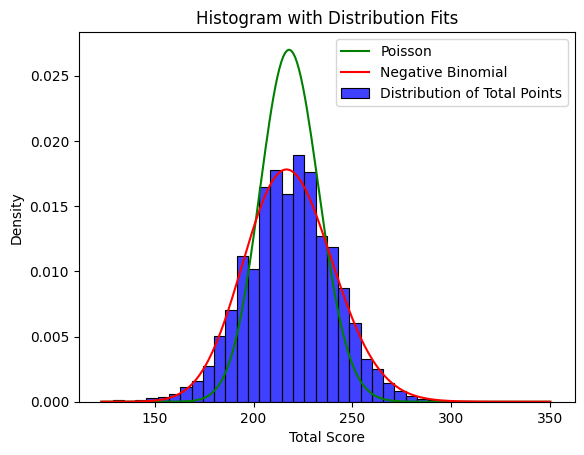

In [66]:
from scipy.stats import poisson, nbinom

ts_mean = np.mean(total_scores)
ts_var = np.var(total_scores)

#plot data
sns.histplot(total_scores, bins=40, kde=False, color="blue", stat="density", label="Distribution of Total Points")
x = np.arange(min(total_scores), max(total_scores))


#get the pmf of the poisson distribution
poisson_pmf = poisson.pmf(x, mu=ts_mean)

#plot it
plt.plot(x, poisson_pmf, 'g-', label='Poisson')



r_est = (ts_mean ** 2) / (ts_var - ts_mean)
p_est = ts_mean / ts_var
nb_pmf = nbinom.pmf(x, r_est, p_est)
plt.plot(x, nb_pmf, 'r-', label="Negative Binomial")

plt.legend()
plt.xlabel('Total Score')
plt.ylabel('Density')
plt.title('Histogram with Distribution Fits')
plt.show()


This looks pretty obvious that the negative binomial distribution is a better fit. Let's verify with a goodness of fit test.